# Case Study 1

In [1]:
#import required packages
import pandas as pd
import numpy as np
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import required dataset into pandas dataframe
df1 = pd.read_csv("E:\Datasets\Data\Fines paid  by doctors.csv")
df2 = pd.read_excel("E:\Datasets\Data\Emails sent.xlsx")

In [3]:
#printing dataset shape
print("Dataset Shape : ", df1.shape)
print("Columns present : ",df1.columns)
df1.head()

Dataset Shape :  (10087, 8)
Columns present :  Index(['org_indiv', 'first_name', 'last_name', 'city', 'state', 'category',
       ' cash_fine ', ' online_fine '],
      dtype='object')


,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-


In [4]:
#obtaining the information on the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   org_indiv      10087 non-null  object
 1   first_name     9884 non-null   object
 2   last_name      10087 non-null  object
 3   city           10087 non-null  object
 4   state          10087 non-null  object
 5   category       10086 non-null  object
 6    cash_fine     10087 non-null  object
 7    online_fine   10087 non-null  object
dtypes: object(8)
memory usage: 630.6+ KB


In [5]:
#printing dataset shape
print("Dataset Shape : ", df2.shape)
print("Columns present : ",df2.columns)
df2.head()

Dataset Shape :  (272, 5)
Columns present :  Index(['name_last', 'name_first', 'name_middle', 'mail_sent_date', 'office'], dtype='object')


,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health


In [6]:
#obtaining the information on the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name_last       272 non-null    object
 1   name_first      272 non-null    object
 2   name_middle     181 non-null    object
 3   mail_sent_date  272 non-null    object
 4   office          272 non-null    object
dtypes: object(5)
memory usage: 10.8+ KB


In [7]:
#loop to convert cash fine and online fine values: numeric to float values , other values to 0 value
for i in range(len(df1)):
    df1.iloc[i][' cash_fine '] = df1.iloc[i][' cash_fine '][1:].replace(',','')
    
    if df1.iloc[i][' cash_fine '][0].isnumeric():
        float(df1.iloc[i][' cash_fine '])    
    else:
        df1.iloc[i][' cash_fine ']=0
    
        
    df1.iloc[i][' online_fine '] = df1.iloc[i][' online_fine '][1:].replace(',','')
    
    if df1.iloc[i][' online_fine '][0].isnumeric():
        float(df1.iloc[i][' online_fine '])
    else:
        df1.iloc[i][' online_fine ']=0
        

In [8]:
#convert cash fine and online fine columns from object type to float type
df1[' cash_fine '] = df1[' cash_fine '].astype(float)
df1[' online_fine '] = df1[' online_fine '].astype(float)

#add the values to cash fine and online fine to obtain total fine paid in fine column
# fine = cash_fine + online_fine
df1['fine']= df1[' cash_fine '] + df1[' online_fine ']

In [9]:
#obtain information of modified dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   org_indiv      10087 non-null  object 
 1   first_name     9884 non-null   object 
 2   last_name      10087 non-null  object 
 3   city           10087 non-null  object 
 4   state          10087 non-null  object 
 5   category       10086 non-null  object 
 6    cash_fine     10087 non-null  float64
 7    online_fine   10087 non-null  float64
 8   fine           10087 non-null  float64
dtypes: float64(3), object(6)
memory usage: 709.4+ KB


In [10]:
#view dataset
df1.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,0.0,1800.0


### Standardise the mail_sent_date column values to YYYY-MM-DD standard date format

In [11]:
#convert mail_sent_date column to standard YYYY-MM-DD format
df2["mail_sent_date"] = pd.to_datetime(df2["mail_sent_date"]).dt.strftime("%Y-%m-%d")

print('On standardizing the date values to YYYY-MM-DD :')
df2.head()

On standardizing the date values to YYYY-MM-DD :


,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014-11-15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014-07-17,Center for Devices and Radiological Health


### In which Year maximum number of emails were sent to doctors?

In [12]:
#extract year from mail_sent_date column and place it in Year column
df2['Year'] = pd.to_datetime(df2['mail_sent_date']).dt.strftime("%Y")
df2.head()

,name_last,name_first,name_middle,mail_sent_date,office,Year
0,ADELGLASS,JEFFREY,M.,2009-05-22,Center for Drug Evaluation and Research,2009
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research,2010
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health,2012
3,AMSTERDAM,DANIEL,NaN,2014-11-15,Center for Biologics Evaluation and Research,2014
4,AMSTUTZ,HARLAN,C.,2014-07-17,Center for Devices and Radiological Health,2014


In [13]:
#obtain total number of mails sent to doctors for the years
mails = []
year = []
for group,frame in df2.groupby('Year'):
    mails.append((len(frame)))
    year.append(group)

#print the year for which maximum number of mails were sent to doctors
max_mails = max(mails)
print("Maximum number of emails were sent to doctors in the year "+str(year[mails.index(max_mails)])+
      " and the number of mails send were "+str((max_mails)))

Maximum number of emails were sent to doctors in the year 2014 and the number of mails send were 32


### Write a query to get total fine paid per Office

In [14]:
#Join(inner join) both datasets on first name and last name
dataframe = pd.merge(df1, df2, how='inner', left_on=['first_name','last_name'],right_on=['name_first','name_last'])

In [15]:
#view information on merged dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   org_indiv       24 non-null     object 
 1   first_name      24 non-null     object 
 2   last_name       24 non-null     object 
 3   city            24 non-null     object 
 4   state           24 non-null     object 
 5   category        24 non-null     object 
 6    cash_fine      24 non-null     float64
 7    online_fine    24 non-null     float64
 8   fine            24 non-null     float64
 9   name_last       24 non-null     object 
 10  name_first      24 non-null     object 
 11  name_middle     8 non-null      object 
 12  mail_sent_date  24 non-null     object 
 13  office          24 non-null     object 
 14  Year            24 non-null     object 
dtypes: float64(3), object(12)
memory usage: 3.0+ KB


In [16]:
#drop one of the common columns from the dataset
dataframe.drop(['name_first','name_last','name_middle'], axis=1, inplace=True)

In [17]:
#obtain mean of fine paid by each office
print('Total Fine Paid per Office is as : ')
for group,frame in dataframe.groupby('office'):
    print('Total fine paid by office '+ str(group)+' is : '+ str(round(mean(frame['fine']), 2)))

Total Fine Paid per Office is as : 
Total fine paid by office Center for Biologics Evaluation and Research is : 724.0
Total fine paid by office Center for Devices and Radiological Health is : 4472.71
Total fine paid by office Center for Drug Evaluation and Research is : 7982.08


### Write a query to get the highest total fine and lowest total fine paid per state

In [18]:
result = df1.groupby('state').agg({'fine': ['min', 'max']})
print("Lowest total fine and Highest total fine paid by each state is as: ")
print(result)

Lowest total fine and Highest total fine paid by each state is as: 
         fine           
          min        max
state                   
AK     1750.0     1750.0
AL       26.0   232991.0
AR       26.0    77670.0
AZ       26.0   151642.0
CA       25.0   323122.0
CO       31.0   282565.0
CT       25.0   132853.0
DC       25.0    62000.0
DE       36.0    19750.0
FL       25.0  1185466.0
GA       25.0   101734.0
HI      102.0     6500.0
IA       26.0   123375.0
ID       33.0     7000.0
IL       25.0   160984.0
IN       26.0    40500.0
KS       29.0    70000.0
KY       26.0   137642.0
LA       27.0    42000.0
MA       29.0   617548.0
MD       26.0   171986.0
ME       42.0     6000.0
MI       26.0   152466.0
MN       25.0   146623.0
MO       26.0    88302.0
MS       34.0     8500.0
MT       29.0     4350.0
NC        0.0   857698.0
ND       63.0     4450.0
NE       25.0    50449.0
NH       96.0    78000.0
NJ       25.0    88087.0
NM       60.0    18750.0
NV       25.0     9200.0
NY     

### Write a query to get the least 2 states that had to pay minimum 'online' fine 

In [19]:
#replace 0 values in online fine with Nan
df1[' online_fine '] = df1[' online_fine '].replace(0, np.NaN)
df1.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,NaN,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,NaN,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,NaN,1800.0


In [20]:
#obtain minimum of online fine paid by each state
online_fine = df1.groupby('state').agg({' online_fine ': ['min']})

#convert state names from index to column by resetting the index
online_fine.reset_index(level=0,inplace=True)

#obtain information for this dataframe
online_fine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (state, )             52 non-null     object 
 1   ( online_fine , min)  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


In [21]:
#rename the columns
online_fine.columns = ['state_name','min_online_fine']

#fill Nan values with 0
online_fine.fillna(0, inplace=True)

#obtain information for dataset
online_fine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state_name       52 non-null     object 
 1   min_online_fine  52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


In [22]:
#obtain least 2 states with minimum online fine
print('The least 2 states that had to pay minimum online fine are :')
online_fine.nsmallest(2,['min_online_fine'])

The least 2 states that had to pay minimum online fine are :


,state_name,min_online_fine
0,AK,0.0
4,CA,25.0


### Write a SQL query to find the number of doctors that contributed to the state having highest 'cash' fine

In [23]:
#obtain maximum cash fine paid by the states
cashfine_max_values = []
for group,frame in df1.groupby('state'):
    cashfine_max_values.append(frame[' cash_fine '].max())

#obtain the state which paid maximum cash fine  
max_cashfine_for_group = max(cashfine_max_values)

#obtain the number of doctors who contributed to state having highest cash fine
for group,frame in df1.groupby('state'):
    if frame[' cash_fine '].max() == max_cashfine_for_group:
        print("Numeber of Doctors that contributed to the state have highest cash fine is : "+str(len(frame))+
              ", for the state : "+str(group))

Numeber of Doctors that contributed to the state have highest cash fine is : 738, for the state : FL


### Get the top 5 average fine paid per state and category

In [24]:
#obtain mean of total fine paid by the states and categories
state_category_group = []
mean_fine = []
for group,frame in df1.groupby(['state','category']):
    state_category_group.append(str(group))
    mean_fine.append(mean(frame['fine']))

In [25]:
#combine two lists to form the dataframe
state_cat_df = pd.DataFrame(list(zip(state_category_group,mean_fine)), columns = ['State-Category','MeanFine'])

#sort the data in descending order of meanfine paid
state_cat_df.sort_values("MeanFine", ascending = False, inplace = True)

#print top 5 of the average fine paid per state and category
print('Top 5 average fine paid per state and category : ')
state_cat_df.head()

Top 5 average fine paid per state and category : 


,State-Category,MeanFine
279,"('UT', 'Infosys Sponsored Research initiated b...",224997.000000
229,"('OR', 'Infosys Sponsored Research initiated b...",186490.000000
59,"('FL', 'Infosys Sponsored Research initiated o...",181115.571429
266,"('TN', 'Infosys Sponsored Research initiated o...",177786.000000
237,"('PA', 'Investigator-Initiated Research')",150778.000000


### Any other insight from the dataset based on exploratory analysis can be can also be shared

**Plot 1**

Text(0.5, 1.0, 'Mails sent over Years')

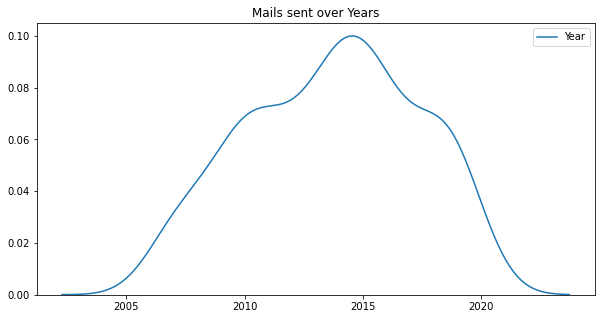

In [26]:
#plot for duration of series
fig,axs=plt.subplots(figsize=(10,5))
g=sns.kdeplot(df2['Year'])
g.set_title("Mails sent over Years")

Plot 1:
1. It shows that Maximum mails were sent between 2010 and 2015, mostly around 2014
2. The number of mails increased from 2005 onwards and was at maximum at 2014, from then the number of mails reduced 

**Plot 2**

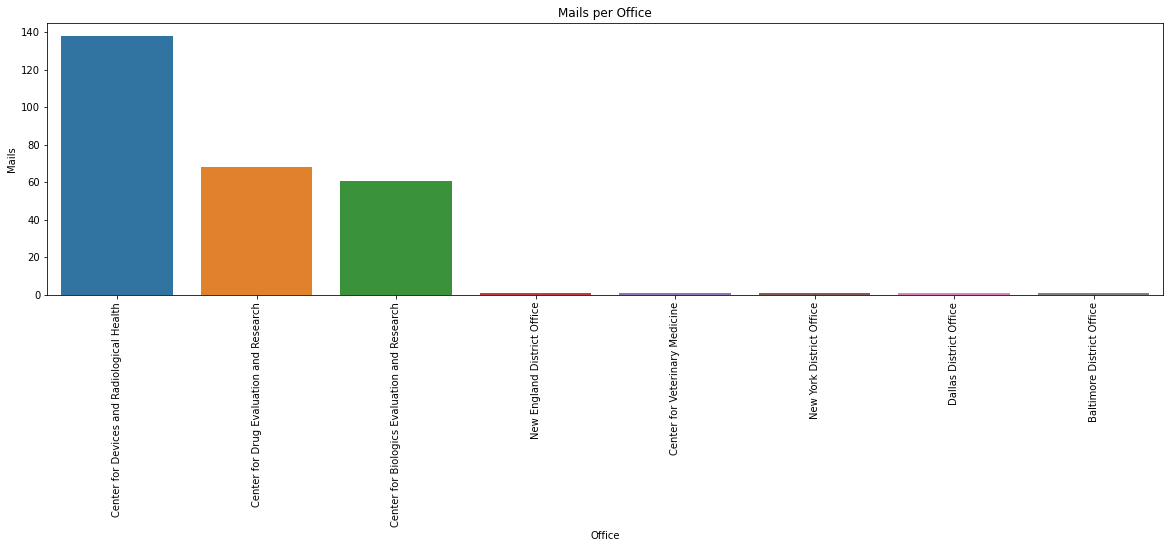

In [27]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=df2['office'].value_counts().index,y=df2['office'].value_counts())
g.set_title("Mails per Office")
g.set_xlabel("Office")
g.set_ylabel("Mails")
g.tick_params(axis='x', labelrotation=90)
plt.show()

Plot 2:
1. Maximum number of mails were sent to Center for Devices and Radiological Health, followed by Center for Dru Evaluation and Research
2. Maximum number of mails sent was around 140 approximately

**Plot 3**

In [28]:
#fill Nan with 0 value
df1.fillna(0, inplace=True)

#obtain cash fine and online fine paid by each state
cash_fine_s = []
online_fine_s = []
name_state = []
for group,frame in df1.groupby('state'):
    name_state.append(str(group))
    cash_fine_s.append(round( mean(frame[' cash_fine ']) , 1))
    online_fine_s.append(round( mean(frame[' online_fine ']) , 1))

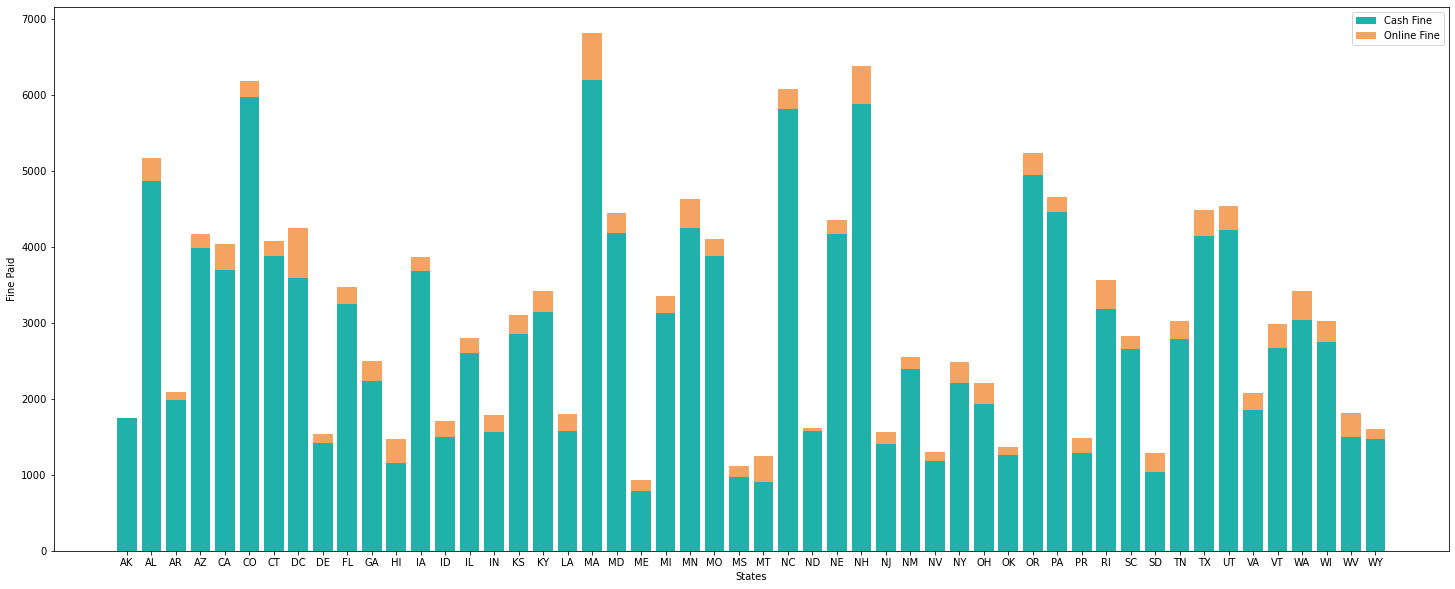

In [29]:
fig,axs=plt.subplots(figsize=(25,10))
plt.bar(name_state, cash_fine_s , color='lightseagreen')
plt.bar(name_state, online_fine_s, bottom=cash_fine_s, color='sandybrown')
plt.xlabel("States")
plt.ylabel("Fine Paid")
plt.legend(["Cash Fine","Online Fine"])
plt.show()

Plot 3:
1. For every state most of the amount paid as fine is in cash whereas very less amount is paid online
2. Maximum amount of total fine as well as maximum amount of cash fine is paid by MA
3. The only state with no online fine, total fine amount completely paid in cash is AK 